In [1]:
import json
import pandas as pd
import numpy as np

### Reading json data from local file and Converting into Dataframe

In [22]:
records=[]
for line in open('customersdata.json', 'r'):
    records.append(json.loads(line))

In [23]:
len(records)

168

In [24]:
records[0]

{'fraudulent': False,
 'customer': {'customerEmail': 'josephhoward@yahoo.com',
  'customerPhone': '400-108-5415',
  'customerDevice': 'yyeiaxpltf82440jnb3v',
  'customerIPAddress': '8.129.104.40',
  'customerBillingAddress': '5493 Jones Islands\nBrownside, CA 51896'},
 'orders': [{'orderId': 'vjbdvd',
   'orderAmount': 18,
   'orderState': 'pending',
   'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'},
  {'orderId': 'yp6x27',
   'orderAmount': 26,
   'orderState': 'fulfilled',
   'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'}],
 'paymentMethods': [{'paymentMethodId': 'wt07xm68b',
   'paymentMethodRegistrationFailure': True,
   'paymentMethodType': 'card',
   'paymentMethodProvider': 'JCB 16 digit',
   'paymentMethodIssuer': 'Citizens First Banks'}],
 'transactions': [{'transactionId': 'a9lcj51r',
   'orderId': 'vjbdvd',
   'paymentMethodId': 'wt07xm68b',
   'transactionAmount': 18,
   'transactionFailed': False},
  {'transactionId': 'y4wcv03i',
   

### Creating feature vectors for Each record 



>As each customer is associated with multiple orders and transaction . We will first create seperate data frames for Orders and Customer Info.


>Later we will merge all these into single data frame . We would have to aggregate data having same customer .


In [74]:
customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress=[],[],[],[],[]


fraudulent=[]

In [75]:
## create customer data frame .Details of each customer
for result in records:
    fraudulent.append(result['fraudulent'])
    
    customerEmail.append(result['customer']['customerEmail'])
    customerPhone.append(result['customer']['customerPhone'])
    customerDevice.append(result['customer']['customerDevice'])
    customerIPAddress.append(result['customer']['customerIPAddress'])
    customerBillingAddress.append(result['customer']['customerBillingAddress'])
    
    
customer_info=pd.DataFrame({'fraudulent':fraudulent,'customerEmail':customerEmail,'customerPhone':customerPhone,'customerDevice':customerDevice,'customerIPAddress':customerIPAddress,'customerBillingAddress':customerBillingAddress})



In [79]:
customer_info.head()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


In [53]:
## Extracting order and transaction data 

customerEmail=[]
orderId=[]
orderAmount=[]
orderState=[]

orderShippingAddress=[]




In [155]:
transactionId=[]
paymentMethodId=[]
transactionAmount=[]
transactionFailed=[]

In [54]:

## create Order Details  data frame .Details of each order 
for result in records:
    
    
    
    for order in result['orders']:
        customerEmail.append(result['customer']['customerEmail'])
        
        orderId.append(order['orderId'])
        orderAmount.append(order['orderAmount'])
        orderState.append(order['orderState'])

        orderShippingAddress.append(order['orderShippingAddress'])
    
        
        
        
   

In [59]:
print(len(orderState))

478


In [60]:
order_details=pd.DataFrame({'customerEmail':customerEmail,'orderId':orderId,'orderAmount':orderAmount,'orderState':orderState,'orderShippingAddress':orderShippingAddress})

In [61]:
order_details.head()

,customerEmail,orderId,orderAmount,orderState,orderShippingAddress
0,josephhoward@yahoo.com,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,josephhoward@yahoo.com,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,evansjeffery@yahoo.com,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,evansjeffery@yahoo.com,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,evansjeffery@yahoo.com,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [ ]:

## create Transaction Details  data frame .Details of each order 

In [156]:
customerEmail=[]
for result in records:
    

      
        
        
    for tr in result['transactions']:
        customerEmail.append(result['customer']['customerEmail'])
        
        transactionId.append(tr['transactionId'])
        paymentMethodId.append(tr['paymentMethodId'])
        transactionAmount.append(tr['transactionAmount'])
        transactionFailed.append(tr['transactionFailed'])


In [157]:
transac_details=pd.DataFrame({'customerEmail':customerEmail,'transactionId':transactionId,'paymentMethodId':paymentMethodId,'transactionAmount':transactionAmount,'transactionFailed':transactionFailed})

In [158]:
transac_details.head()

,customerEmail,transactionId,paymentMethodId,transactionAmount,transactionFailed
0,josephhoward@yahoo.com,a9lcj51r,wt07xm68b,18,False
1,josephhoward@yahoo.com,y4wcv03i,wt07xm68b,26,False
2,evansjeffery@yahoo.com,5mi94sfw,41ug157xz,45,False
3,evansjeffery@yahoo.com,br8ba1nu,41ug157xz,23,False
4,evansjeffery@yahoo.com,a33145ss,y3xp697jx,43,True


In [83]:
paymentMethodId =[]

paymentMethodRegistrationFailure=[]
paymentMethodType=[]
paymentMethodProvider=[]
paymentMethodIssuer=[]
customerEmail=[]

In [84]:

## create Payment Details  data frame .Details of each Payment method  
for result in records:
    

      
        
        
    for tr in result['paymentMethods']:
        customerEmail.append(result['customer']['customerEmail'])
        paymentMethodId.append(tr['paymentMethodId'])
        
        paymentMethodRegistrationFailure.append(tr['paymentMethodRegistrationFailure'])
        paymentMethodType.append(tr['paymentMethodType'])
        paymentMethodProvider.append(tr['paymentMethodProvider'])
        paymentMethodIssuer.append(tr['paymentMethodIssuer'])
        

In [122]:

payments_details=pd.DataFrame({'customerEmail':customerEmail,'paymentMethodId':paymentMethodId,'paymentMethodId':paymentMethodId,'paymentMethodRegistrationFailure':paymentMethodRegistrationFailure,'paymentMethodType':paymentMethodType,'paymentMethodProvider':paymentMethodProvider,'paymentMethodIssuer':paymentMethodIssuer})


In [123]:
payments_details.head()

,customerEmail,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,josephhoward@yahoo.com,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,evansjeffery@yahoo.com,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,evansjeffery@yahoo.com,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,evansjeffery@yahoo.com,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,evansjeffery@yahoo.com,m52tx8e1s,False,card,Mastercard,Vertex Bancorp


In [88]:
## list all Dataframes

In [89]:
customer_info.head()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


In [90]:
order_details.head()

,customerEmail,orderId,orderAmount,orderState,orderShippingAddress
0,josephhoward@yahoo.com,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,josephhoward@yahoo.com,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,evansjeffery@yahoo.com,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,evansjeffery@yahoo.com,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,evansjeffery@yahoo.com,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [91]:
transac_details.head()

,customerEmail,transactionId,paymentMethodId,transactionAmount,transactionFailed
0,josephhoward@yahoo.com,a9lcj51r,wt07xm68b,18,False
1,josephhoward@yahoo.com,y4wcv03i,wt07xm68b,26,False
2,evansjeffery@yahoo.com,5mi94sfw,41ug157xz,45,False
3,evansjeffery@yahoo.com,br8ba1nu,41ug157xz,23,False
4,evansjeffery@yahoo.com,a33145ss,y3xp697jx,43,True


In [92]:
payments_details.head()

,customerEmail,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,josephhoward@yahoo.com,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,evansjeffery@yahoo.com,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,evansjeffery@yahoo.com,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,evansjeffery@yahoo.com,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,evansjeffery@yahoo.com,m52tx8e1s,False,card,Mastercard,Vertex Bancorp


In [124]:
payments_details.shape

(342, 6)

In [94]:
transac_details.shape

(623, 5)

In [95]:
order_details.shape

(478, 5)

In [96]:
customer_info.shape

(168, 6)

In [105]:
payments_details.dtypes

customerEmail                       object
paymentMethodId                     object
paymentMethodRegistrationFailure      bool
paymentMethodType                   object
paymentMethodProvider               object
paymentMethodIssuer                 object
dtype: object

In [110]:
payments_details.paymentMethodType.value_counts()

card         242
paypal        36
apple pay     36
bitcoin       28
Name: paymentMethodType, dtype: int64

In [111]:
payments_details.paymentMethodRegistrationFailure.value_counts()

False    302
True      40
Name: paymentMethodRegistrationFailure, dtype: int64

In [112]:

payments_details.paymentMethodProvider.value_counts()

JCB 16 digit                   65
VISA 16 digit                  57
Voyager                        36
Diners Club / Carte Blanche    34
Maestro                        32
VISA 13 digit                  32
Discover                       25
American Express               22
JCB 15 digit                   20
Mastercard                     19
Name: paymentMethodProvider, dtype: int64

In [113]:
paymentMethodIssuer


payments_details.paymentMethodIssuer.value_counts()

Her Majesty Trust           43
Vertex Bancorp              37
Fountain Financial Inc.     35
His Majesty Bank Corp.      33
Bulwark Trust Corp.         29
Bastion Banks               29
Citizens First Banks        28
Grand Credit Corporation    27
Solace Banks                27
Rose Bancshares             25
B                            7
e                            5
c                            4
r                            3
o                            2
x                            2
                             2
n                            2
p                            1
a                            1
Name: paymentMethodIssuer, dtype: int64

In [125]:
payments_details=payments_details.drop(['paymentMethodId','customerEmail'],axis=1)

In [126]:
payments_details.head()

,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,True,card,JCB 16 digit,Citizens First Banks
1,True,bitcoin,VISA 16 digit,Solace Banks
2,False,card,VISA 16 digit,Vertex Bancorp
3,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,False,card,Mastercard,Vertex Bancorp


In [127]:
payments_details.paymentMethodRegistrationFailure=payments_details.paymentMethodRegistrationFailure.astype('object')
payments_details=pd.get_dummies(payments_details)

In [128]:
payments_details.head()

,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,...,paymentMethodIssuer_Solace Banks,paymentMethodIssuer_Vertex Bancorp,paymentMethodIssuer_a,paymentMethodIssuer_c,paymentMethodIssuer_e,paymentMethodIssuer_n,paymentMethodIssuer_o,paymentMethodIssuer_p,paymentMethodIssuer_r,paymentMethodIssuer_x
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [130]:
payments_details['customerEmail']=customerEmail


In [131]:
payments_details.head()

,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,...,paymentMethodIssuer_Vertex Bancorp,paymentMethodIssuer_a,paymentMethodIssuer_c,paymentMethodIssuer_e,paymentMethodIssuer_n,paymentMethodIssuer_o,paymentMethodIssuer_p,paymentMethodIssuer_r,paymentMethodIssuer_x,customerEmail
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,josephhoward@yahoo.com
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,evansjeffery@yahoo.com
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,evansjeffery@yahoo.com
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,evansjeffery@yahoo.com
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,evansjeffery@yahoo.com


In [133]:
fp_p=payments_details.groupby(['customerEmail']).sum().reset_index()

In [134]:
fp_p.shape

(150, 37)

In [135]:
fp_p.head()

,customerEmail,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,...,paymentMethodIssuer_Solace Banks,paymentMethodIssuer_Vertex Bancorp,paymentMethodIssuer_a,paymentMethodIssuer_c,paymentMethodIssuer_e,paymentMethodIssuer_n,paymentMethodIssuer_o,paymentMethodIssuer_p,paymentMethodIssuer_r,paymentMethodIssuer_x
0,1yf0@jedyz63t,4,0,0,0,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3fooiar@6eph,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9es7t@u6n7x,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abigail08@yahoo.com,1,1,0,0,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,alec27@bell.com,2,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
order_details.head()

,customerEmail,orderId,orderAmount,orderState,orderShippingAddress
0,josephhoward@yahoo.com,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,josephhoward@yahoo.com,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,evansjeffery@yahoo.com,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,evansjeffery@yahoo.com,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,evansjeffery@yahoo.com,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [137]:
transac_details.head()

,customerEmail,transactionId,paymentMethodId,transactionAmount,transactionFailed
0,josephhoward@yahoo.com,a9lcj51r,wt07xm68b,18,False
1,josephhoward@yahoo.com,y4wcv03i,wt07xm68b,26,False
2,evansjeffery@yahoo.com,5mi94sfw,41ug157xz,45,False
3,evansjeffery@yahoo.com,br8ba1nu,41ug157xz,23,False
4,evansjeffery@yahoo.com,a33145ss,y3xp697jx,43,True


In [138]:
or_c=order_details.customerEmail


In [140]:
order_details=order_details.drop(['customerEmail','orderId','orderShippingAddress'],axis=1)
order_details.head()

,orderAmount,orderState
0,18,pending
1,26,fulfilled
2,45,fulfilled
3,23,fulfilled
4,43,fulfilled


In [142]:
order_details=pd.get_dummies(order_details)
order_details.head()

,orderAmount,orderState_failed,orderState_fulfilled,orderState_pending
0,18,0,0,1
1,26,0,1,0
2,45,0,1,0
3,23,0,1,0
4,43,0,1,0


In [143]:
order_details['customerEmail']=or_c
order_details.head()

,orderAmount,orderState_failed,orderState_fulfilled,orderState_pending,customerEmail
0,18,0,0,1,josephhoward@yahoo.com
1,26,0,1,0,josephhoward@yahoo.com
2,45,0,1,0,evansjeffery@yahoo.com
3,23,0,1,0,evansjeffery@yahoo.com
4,43,0,1,0,evansjeffery@yahoo.com


In [145]:
fp_or=order_details.groupby(['customerEmail']).sum().reset_index()
fp_or.head()

,customerEmail,orderAmount,orderState_failed,orderState_fulfilled,orderState_pending
0,1yf0@jedyz63t,124,0,5,0
1,9es7t@u6n7x,16,0,1,0
2,abigail08@yahoo.com,119,1,1,1
3,alec27@bell.com,98,0,3,1
4,aliciaanthony@martin.com,95,0,3,0


In [159]:
transac_details.dtypes

customerEmail        object
transactionId        object
paymentMethodId      object
transactionAmount     int64
transactionFailed      bool
dtype: object

In [160]:
transac_details.transactionFailed=transac_details.transactionFailed.astype('object')

In [161]:
tr_c=transac_details.customerEmail

In [162]:
transac_details=transac_details.drop(['customerEmail','transactionId','paymentMethodId'],axis=1)
transac_details.head()

,transactionAmount,transactionFailed
0,18,False
1,26,False
2,45,False
3,23,False
4,43,True


In [163]:
transac_details=pd.get_dummies(transac_details)
transac_details.head()

,transactionAmount,transactionFailed_False,transactionFailed_True
0,18,1,0
1,26,1,0
2,45,1,0
3,23,1,0
4,43,0,1


In [164]:
transac_details['customerEmail']=tr_c
transac_details.head()

,transactionAmount,transactionFailed_False,transactionFailed_True,customerEmail
0,18,1,0,josephhoward@yahoo.com
1,26,1,0,josephhoward@yahoo.com
2,45,1,0,evansjeffery@yahoo.com
3,23,1,0,evansjeffery@yahoo.com
4,43,0,1,evansjeffery@yahoo.com


In [165]:
fp_tr=transac_details.groupby(['customerEmail']).sum().reset_index()
fp_tr.head()

,customerEmail,transactionAmount,transactionFailed_False,transactionFailed_True
0,1yf0@jedyz63t,217,5,5
1,9es7t@u6n7x,32,1,1
2,abigail08@yahoo.com,209,3,2
3,alec27@bell.com,158,4,2
4,aliciaanthony@martin.com,95,3,0


### Merging all Data Frames to Single DataFrame Based on customerEmail as commoon key

In [166]:
customer_info.head()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


In [167]:
customer_info.shape

(168, 6)

In [170]:
len(customer_info.customerPhone.unique())

168

In [171]:
len(customer_info.customerDevice.unique())

168

In [172]:
len(customer_info.customerIPAddress.unique())

165

In [175]:

final_df_1=pd.merge(customer_info,fp_p,on='customerEmail',how='left')
final_df_2=pd.merge(final_df_1,fp_tr,on='customerEmail',how='left')
final_df=pd.merge(final_df_2,fp_or,on='customerEmail',how='left')
final_df.head()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,...,paymentMethodIssuer_p,paymentMethodIssuer_r,paymentMethodIssuer_x,transactionAmount,transactionFailed_False,transactionFailed_True,orderAmount,orderState_failed,orderState_fulfilled,orderState_pending
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,44.0,2.0,0.0,44.0,0.0,1.0,1.0
1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,6.0,1.0,0.0,2.0,...,0.0,0.0,0.0,111.0,2.0,1.0,111.0,0.0,3.0,0.0
2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,131.0,3.0,2.0,82.0,1.0,2.0,0.0
3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,85.0,3.0,0.0,85.0,0.0,3.0,0.0
4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",6.0,0.0,3.0,0.0,...,0.0,0.0,0.0,411.0,5.0,2.0,411.0,1.0,6.0,0.0


In [ ]:
#### Removing few feature which are basically ID's 

In [176]:
final_df=final_df.drop(['customerEmail','customerPhone','customerDevice','customerIPAddress'],axis=1)

In [177]:
final_df.shape

(168, 45)

## Featue Set

In [178]:
final_df.dtypes

fraudulent                                              bool
customerBillingAddress                                object
paymentMethodRegistrationFailure_False               float64
paymentMethodRegistrationFailure_True                float64
paymentMethodType_apple pay                          float64
paymentMethodType_bitcoin                            float64
paymentMethodType_card                               float64
paymentMethodType_paypal                             float64
paymentMethodProvider_American Express               float64
paymentMethodProvider_Diners Club / Carte Blanche    float64
paymentMethodProvider_Discover                       float64
paymentMethodProvider_JCB 15 digit                   float64
paymentMethodProvider_JCB 16 digit                   float64
paymentMethodProvider_Maestro                        float64
paymentMethodProvider_Mastercard                     float64
paymentMethodProvider_VISA 13 digit                  float64
paymentMethodProvider_VI

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

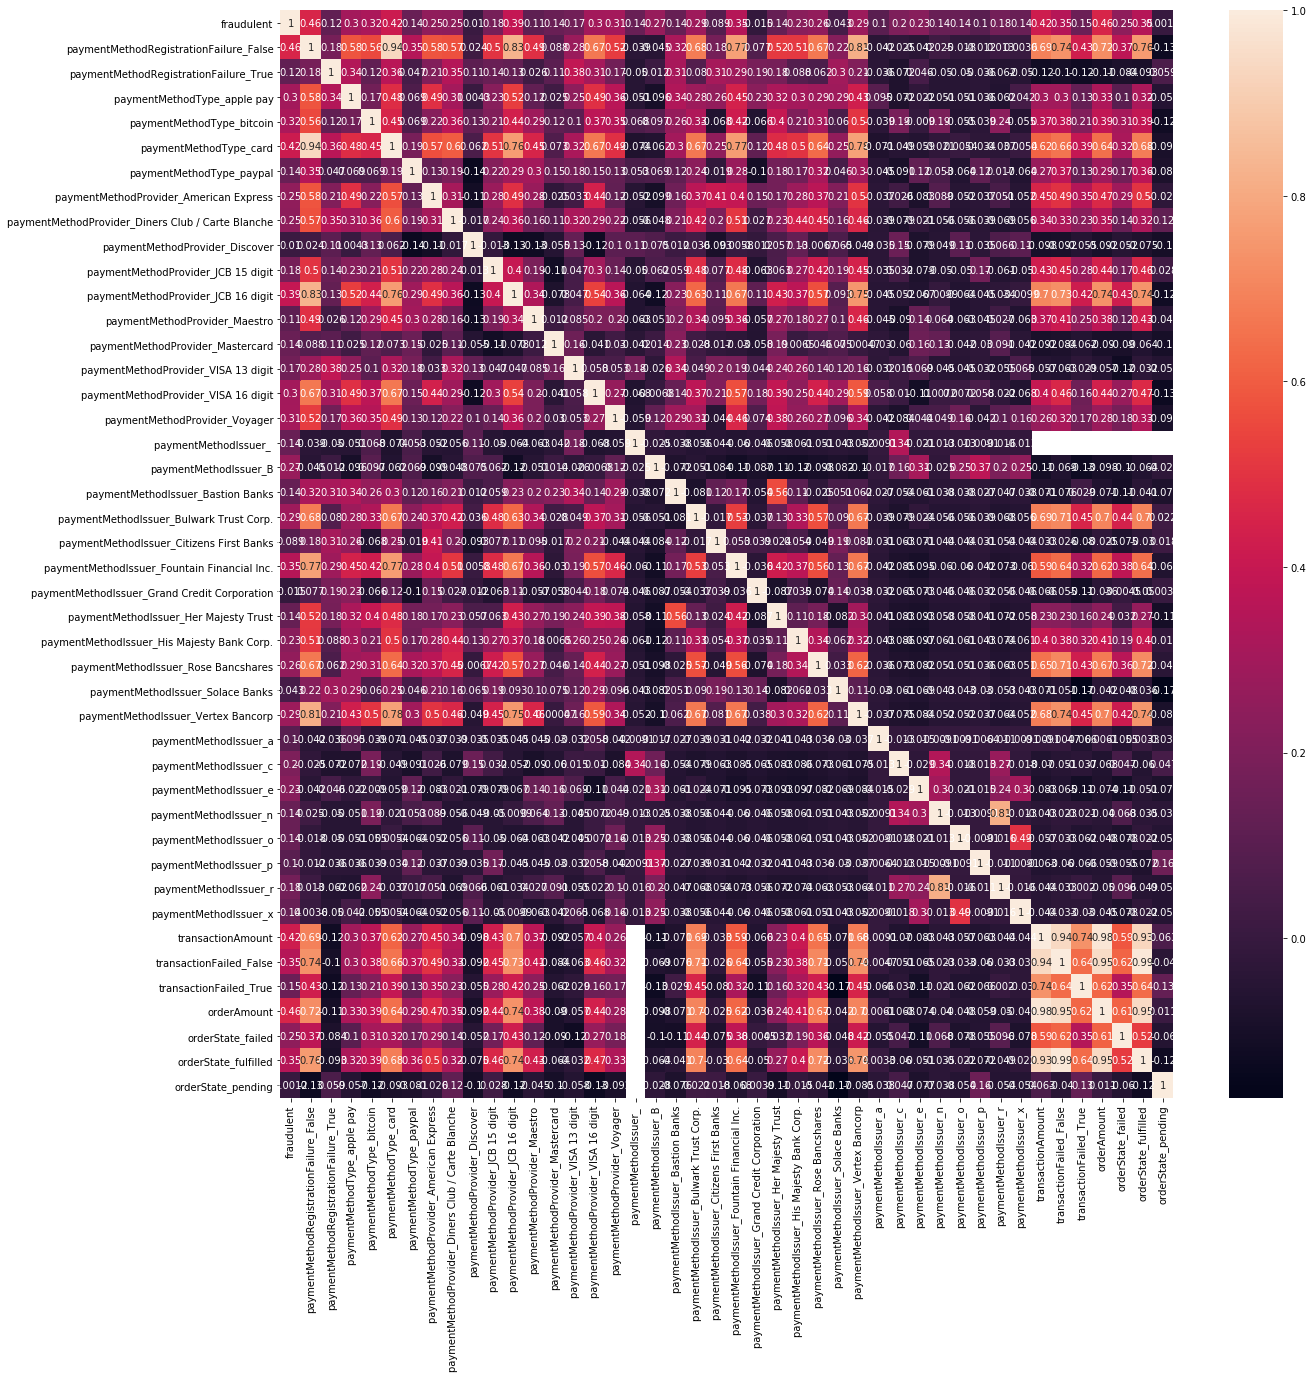

In [181]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True)

> As you can see there is high correlation between feature like transaction amount , order amount and transactino failed or orde fulfilled
. We will keep only one those features . 

In [183]:
final_df=final_df.drop(['transactionAmount','transactionFailed_False','transactionFailed_True'],axis=1)
final_df.head()

,fraudulent,customerBillingAddress,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,...,paymentMethodIssuer_e,paymentMethodIssuer_n,paymentMethodIssuer_o,paymentMethodIssuer_p,paymentMethodIssuer_r,paymentMethodIssuer_x,orderAmount,orderState_failed,orderState_fulfilled,orderState_pending
0,False,"5493 Jones Islands\nBrownside, CA 51896",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,1.0,1.0
1,True,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,6.0,1.0,0.0,2.0,5.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,3.0,0.0
2,False,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,1.0,2.0,0.0
3,False,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,3.0,0.0
4,True,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",6.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,411.0,1.0,6.0,0.0


In [184]:
target=final_df.fraudulent.values

In [185]:
text_data=final_df.customerBillingAddress.values

In [190]:
final_df=final_df.drop(['customerBillingAddress','fraudulent'],axis=1)
final_df=final_df.fillna(0)

In [201]:
X_data=final_df.values

In [202]:
X_data.shape

(168, 40)

## Feature Importance 

One of the great things about Decesion tres are its gives you feature importance . That way we can see which feature contributed most to the model.

We can plot these importance as  bar plot

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [203]:
X_train,X_test,y_train,y_test=train_test_split(X_data,target,test_size=0.2)

In [204]:
rt=RandomForestClassifier()

rt.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [230]:
d1=dict(zip(final_df.columns,rt.feature_importances_))

sorted_features=dict(sorted(d1.items(),key=lambda x:x[1],reverse=True))

In [233]:
sorted_features

{'orderAmount': 0.1925934506096572,
 'paymentMethodRegistrationFailure_False': 0.11035311960153653,
 'paymentMethodIssuer_B': 0.08575286161869553,
 'orderState_fulfilled': 0.057032283249615554,
 'paymentMethodIssuer_Fountain Financial Inc.': 0.04332559353989122,
 'paymentMethodProvider_JCB 16 digit': 0.04022912147777593,
 'paymentMethodIssuer_Vertex Bancorp': 0.03490082248888771,
 'paymentMethodProvider_VISA 16 digit': 0.03208953140558576,
 'paymentMethodType_bitcoin': 0.031208590953851277,
 'paymentMethodType_card': 0.03004177871047895,
 'paymentMethodProvider_Mastercard': 0.02703421800897971,
 'paymentMethodIssuer_r': 0.025989720942293747,
 'paymentMethodIssuer_o': 0.025928089018091606,
 'paymentMethodProvider_Voyager': 0.023325930323998524,
 'paymentMethodProvider_VISA 13 digit': 0.022346029465070714,
 'paymentMethodIssuer_e': 0.0207655233436815,
 'orderState_failed': 0.017928298116834867,
 'paymentMethodType_apple pay': 0.01651886667973354,
 'paymentMethodIssuer_Bulwark Trust Corp.

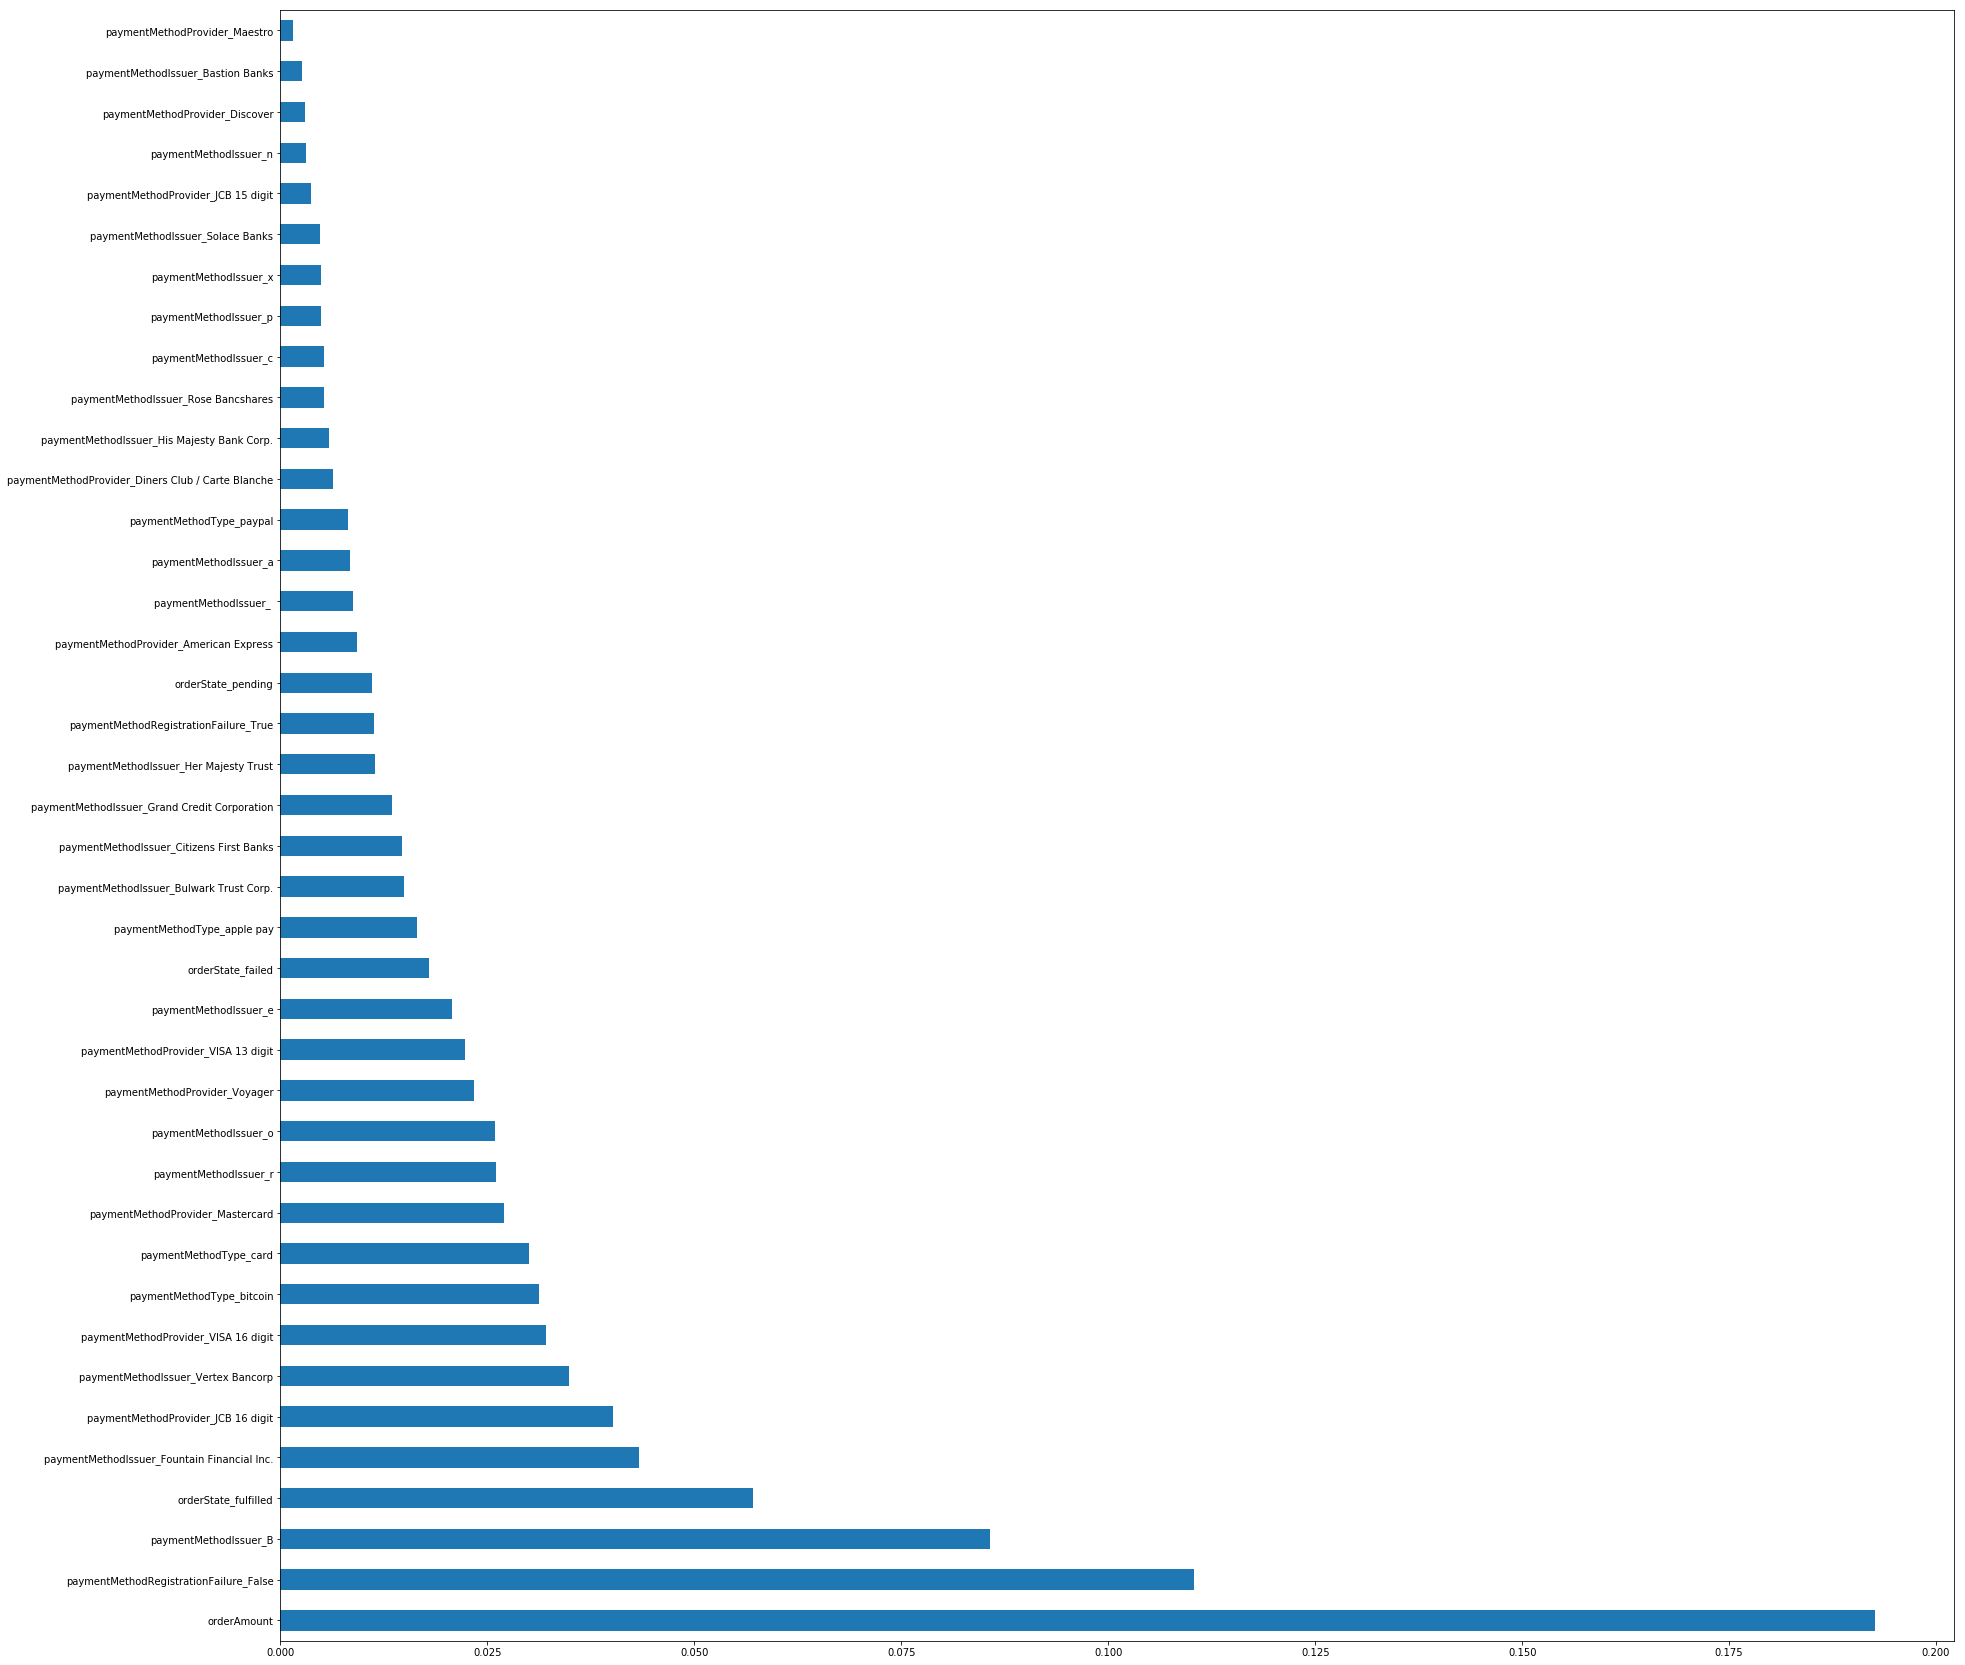

In [234]:

plt.figure(figsize=(30,30))
pd.Series(sorted_features).plot.barh()

As we can see importantance of feature in above diagram.

We can say below are few Important features list  include

1. Order Amount 
2. order State
3. payment Method registration
4. Payment Method issuer 


### Model evaluation

In [235]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,classification_report

In [236]:
y_pred=rt.predict(X_test)

In [237]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.95      0.76      0.84        25
        True       0.57      0.89      0.70         9

    accuracy                           0.79        34
   macro avg       0.76      0.82      0.77        34
weighted avg       0.85      0.79      0.81        34



In [238]:
accuracy_score(y_pred,y_test)

0.7941176470588235

In [239]:
f1_score(y_pred,y_test)

0.6956521739130435

In [240]:
roc_auc_score(y_pred,y_test)

0.8244444444444444

In [241]:


from sklearn.svm import SVC


In [242]:
sv=SVC()
sv.fit(X_train,y_train)


D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [243]:
y_pred=sv.predict(X_test)

In [244]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      0.62      0.77        32
        True       0.14      1.00      0.25         2

    accuracy                           0.65        34
   macro avg       0.57      0.81      0.51        34
weighted avg       0.95      0.65      0.74        34



In [245]:
accuracy_score(y_pred,y_test)

0.6470588235294118

In [246]:
f1_score(y_pred,y_test)

0.25

In [247]:
roc_auc_score(y_pred,y_test)

0.8125

In [249]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [250]:
y_pred=lr.predict(X_test)

In [251]:
roc_auc_score(y_pred,y_test)

0.8703703703703703

In [252]:
f1_score(y_pred,y_test)

0.6666666666666666

In [253]:
accuracy_score(y_pred,y_test)

0.7941176470588235

### Lets try Ensemble Boosting  models for classification

In [248]:
from xgboost              import XGBClassifier

from lightgbm             import LGBMClassifier

In [254]:
xg=XGBClassifier()

In [255]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [256]:
y_pred=xg.predict(X_test)

In [257]:
accuracy_score(y_pred,y_test)

0.8235294117647058

In [258]:
roc_auc_score(y_pred,y_test)

0.8458333333333332

In [259]:
f1_score(y_pred,y_test)

0.75

In [260]:
lg=LGBMClassifier()
lg.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [261]:
y_pred=lg.predict(X_test)

In [262]:
roc_auc_score(y_pred,y_test)


0.7804232804232805

In [263]:
f1_score(y_pred,y_test)

0.5714285714285714

In [264]:
accuracy_score(y_pred,y_test)

0.7352941176470589

According to metrics F1_score , Roc auc score it seems XGBoost is performing better compared to other models . We can now hyperune prameters to improve accuracy 

We will start with increasing n_estimators

In [271]:
xg=XGBClassifier(n_estimators=1500)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)

In [272]:
roc_auc_score(y_pred,y_test)

0.8458333333333332

In [273]:
f1_score(y_pred,y_test)

0.75

In [274]:
accuracy_score(y_pred,y_test)

0.8235294117647058